## Day 32 Lecture 2 Assignment

In this assignment, we will learn about SVM. We will use the csection dataset loaded below and analyze the model generated for this dataset.

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
# Age -  ranges from 18 to 40  
# Delivery number - ranges from 1 to 4
# Delivery time -  {0 = timely , 1 = premature , 2 = latecomer}
# Blood of Pressure - {0 = low , 1 = normal , 2 = high }
# Heart Problem - {0 = apt, 1 = inept }

# Target - Caesarian - {0 = No, 1 = Yes }

csection = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/csection.csv')

Our goal is to predict the patient needed a csection.

In [0]:
csection.head()

,Age,Delivery number,Delivery time,Blood Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


Check whether the data has missing values and remove all rows containing missing values.

In [0]:
# answer below:
list = []
for x in csection:
  print(x, np.unique(csection[x]))

Age [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 35 36 37 38 40]
Delivery number [1 2 3 4]
Delivery time [0 1 2]
Blood Pressure [0 1 2]
Heart Problem [0 1]
Caesarian [0 1]


Examine the distribution of delivery number, blood pressure and heart problem.

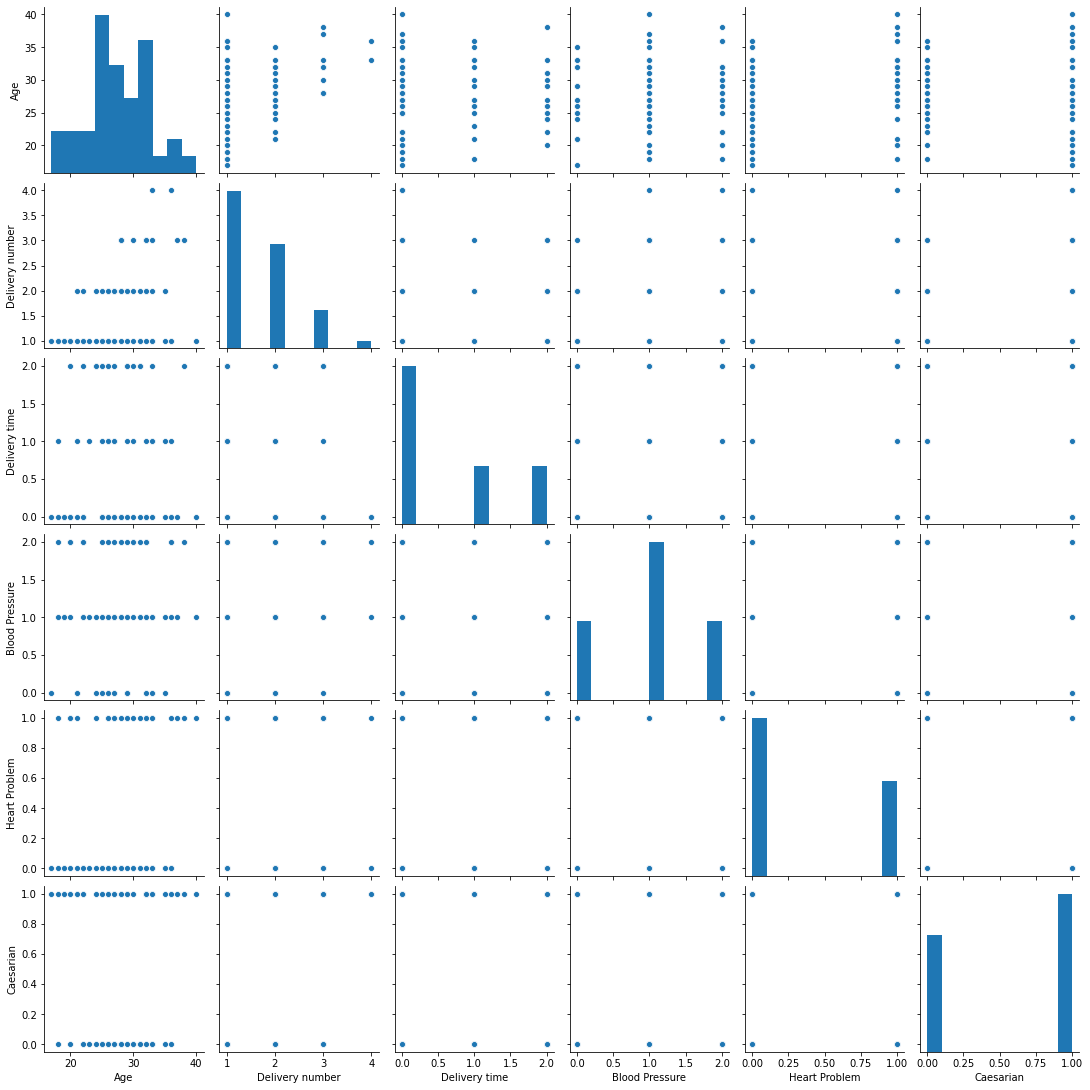

In [0]:
# answer below:
import seaborn as sns
sns.pairplot(csection)

What are your conclusions from the distribtuions of these variables? Write them below.

In [0]:
# answer below:
# Delivery number is positively skewed. Blood pressure tends toward a normal distribution. Heart problems are occurring a little less in this population than no heart problems


Create dummy variables from all columns containing categorical variables with more than two values.

In [0]:
# answer below:
dm = pd.get_dummies(csection['Delivery number'])
dt = pd.get_dummies(csection['Delivery time'])
bp = pd.get_dummies(csection['Blood Pressure'])

csdm = pd.concat([dm, dt, bp, csection.drop(['Delivery number','Delivery time','Blood Pressure'],axis = 1 )], axis = 1)
X = csdm.drop('Caesarian', axis = 1)
y = csdm['Caesarian']

Split the data into test and train with test containing 20% of the data.

In [0]:
# answer below:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2)


Use the linear kernel to train a SVC model on our training data. Report the scores for the training and test data.

In [0]:
# answer below:
clist = [0.00000001, 1,10, 100, 1000, 10000, 100000]

for x in clist:
  from sklearn.svm import SVC
  svm = SVC(kernel = 'linear', C=x )
  svm.fit(X_train, y_train)
  print('For C value of {} the test score is '.format(x) ,svm.score(X_test, y_test))
  print(svm.score(X_train, y_train))


For C value of 1e-08 the test score is  0.4375
0.609375
For C value of 1 the test score is  0.5
0.75
For C value of 10 the test score is  0.5
0.75
For C value of 100 the test score is  0.5
0.765625
For C value of 1000 the test score is  0.5
0.765625
For C value of 10000 the test score is  0.5
0.765625
For C value of 100000 the test score is  0.5
0.75


In [0]:
print(svm.score(X_test, y_test))
print(svm.score(X_train, y_train))

0.5
0.75
